In [1]:
# src/01_eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('/home/dito-adistya/Dito/TA/Coding/LSTM-MBA/data/GSARPC3.csv')
print(f"[INFO] Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns\n")

# --- Preview ---
print("Head:")
print(df.head(), "\n")
print("Info:")
print(df.info(), "\n")

[INFO] Dataset loaded: 636 rows, 4 columns

Head:
        cid                                             smiles  acvalue  \
0  44244736  COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CC=CC=C3F)SC4=...   0.0030   
1  44244911  CC1=NN=C(S1)SC2=C(N=C(O2)C3=CC=CC=C3F)C4=C(C(=...   0.0035   
2  44245235  COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CN=CC=C3)SC4=N...   0.0047   
3  10451021  CC(=CC1=CC(=C(C=C1)OC)O)C(=O)C2=CC(=C(C(=C2)OC...   0.0090   
4  44245073  CC1=CN=C(N=C1C)SC2=C(N=C(O2)C3=CC=CC=C3Cl)C4=C...   0.0180   

  categories  
0  inhibitor  
1  inhibitor  
2  inhibitor  
3  inhibitor  
4  inhibitor   

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cid         636 non-null    int64  
 1   smiles      636 non-null    object 
 2   acvalue     636 non-null    float64
 3   categories  636 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usag

In [3]:
# --- Missing values ---
print("Missing values per column:\n", df.isnull().sum(), "\n")

# --- Statistik dasar numeric ---
if "acvalue" in df.columns:
    print("Descriptive statistics for 'acvalue':\n", df["acvalue"].describe(), "\n")

# --- Unique categories ---
if "categories" in df.columns:
    print("Unique categories:", df["categories"].unique(), "\n")
    print(df["categories"].value_counts(), "\n")

Missing values per column:
 cid           0
smiles        0
acvalue       0
categories    0
dtype: int64 

Descriptive statistics for 'acvalue':
 count    636.000000
mean      28.613347
std       29.345534
min        0.003000
25%        5.022500
50%       17.480000
75%       50.000000
max      122.900000
Name: acvalue, dtype: float64 

Unique categories: ['inhibitor' 'neutral'] 

categories
neutral      321
inhibitor    315
Name: count, dtype: int64 



# Tes

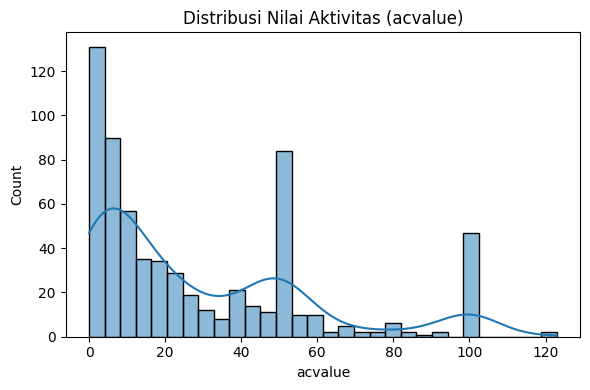

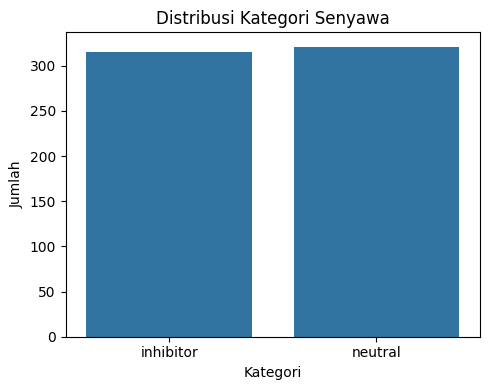

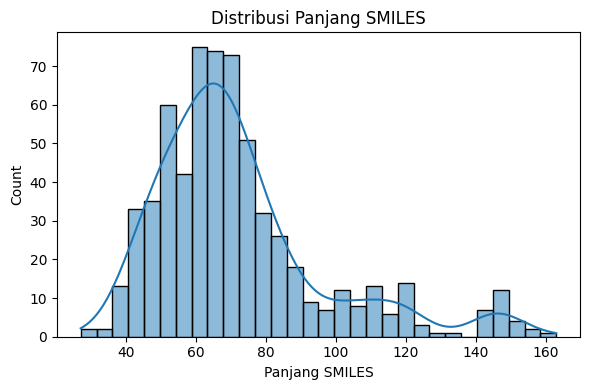

In [5]:
# --- Distribusi nilai aktivitas (acvalue) ---
if "acvalue" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["acvalue"], bins=30, kde=True)
    plt.title("Distribusi Nilai Aktivitas (acvalue)")
    plt.xlabel("acvalue")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# --- Jumlah kategori ---
if "categories" in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="categories", data=df)
    plt.title("Distribusi Kategori Senyawa")
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah")
    plt.tight_layout()
    plt.show()

# --- Panjang SMILES ---
df["smiles_length"] = df["smiles"].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df["smiles_length"], bins=30, kde=True)
plt.title("Distribusi Panjang SMILES")
plt.xlabel("Panjang SMILES")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Validitas SMILES

In [7]:
from rdkit import Chem

def check_validity(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

df['valid'] = df['smiles'].apply(check_validity)
print(df['valid'].value_counts())

# filter yang valid saja
df = df[df['valid']]


valid
True    636
Name: count, dtype: int64


<Axes: >

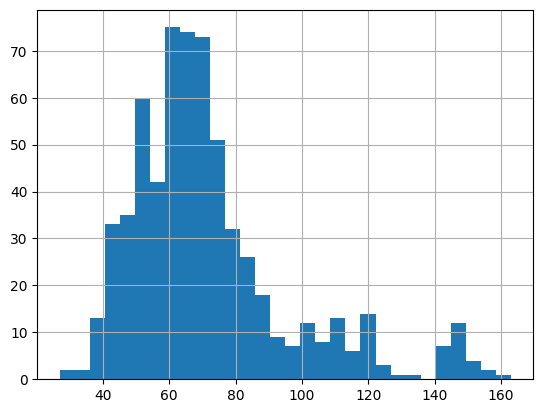

In [8]:
df['smiles_len'] = df['smiles'].apply(len)
df['smiles_len'].hist(bins=30)


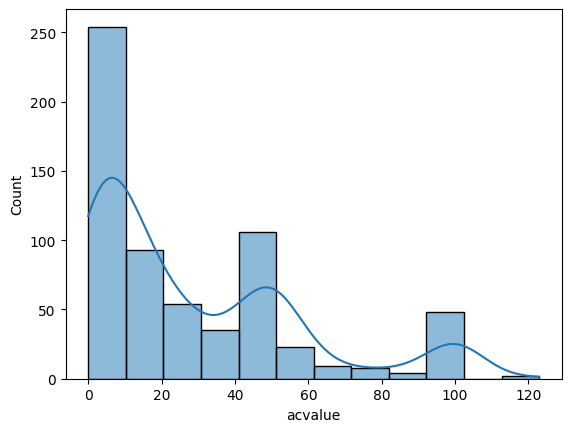

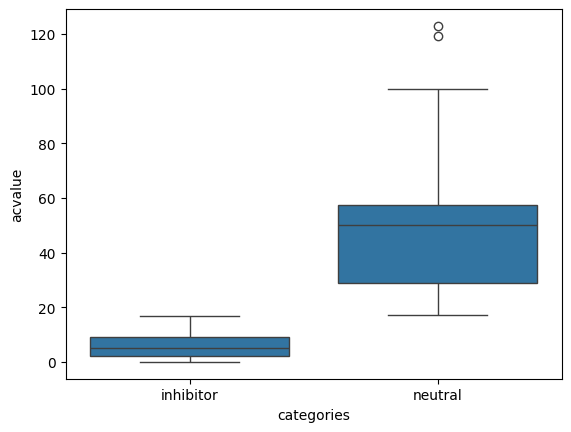

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['acvalue'], kde=True)
plt.show()

sns.boxplot(x='categories', y='acvalue', data=df)
plt.show()


In [15]:
tes = pd.read_csv('/home/dito-adistya/Dito/TA/output.csv')

In [16]:
tes

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,44244736,0,1.3514,1.826282,40.0260,68.434067,26,29,53,34,...,9.322208,70.376447,2.069895,26.935421,11.643681,6.376256,3303.0,58.0,5.991,184.0
1,44244911,0,1.4027,1.967567,45.9247,61.827274,22,24,49,31,...,9.368822,63.365925,2.044062,29.591099,11.635603,9.223926,2552.0,51.0,4.605,164.0
2,44245235,0,0.2811,0.079017,31.3600,59.470274,23,25,48,30,...,8.793852,61.742323,2.058077,27.160446,11.638380,12.353716,2358.0,49.0,2.789,156.0
3,10451021,0,-0.0171,0.000292,51.7744,54.681446,12,12,48,26,...,7.461284,51.572549,1.983560,16.269521,16.269521,0.000000,1780.0,43.0,2.455,128.0
4,44245073,0,2.1069,4.439028,48.2102,68.497446,23,25,55,33,...,8.783672,67.306040,2.039577,26.680257,11.638729,9.314840,3043.0,57.0,5.101,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,145958114,0,0.6609,0.436789,38.3090,88.280618,35,38,69,43,...,8.437446,89.359988,2.078139,27.679593,5.339800,19.207161,8419.0,66.0,10.600,226.0
632,145950639,0,0.6270,0.393129,20.1159,75.209446,33,36,58,36,...,8.382115,75.730881,2.103636,22.295981,0.000000,19.164600,4729.0,55.0,11.068,194.0
633,3168508,1,0.3972,0.157768,24.2742,49.485895,18,20,39,24,...,8.643295,49.131791,2.047158,17.320192,4.775565,9.478077,1391.0,34.0,6.229,120.0
634,145952863,0,-1.1575,1.339806,60.6448,72.051790,17,17,64,34,...,7.284888,68.516978,2.015205,28.910642,10.540206,18.370437,4301.0,45.0,4.590,166.0


In [14]:
import pandas as pd

# baca file csv
df = pd.read_csv("/home/dito-adistya/Dito/TA/Coding/LSTM-MBA/data/padle.csv")

# tulis ke file .smi
with open("data.smi", "w") as f:
    for i, row in df.iterrows():
        f.write(f"{row['SMILES']} {row['Name']}\n")
